## Read data and create the sets we'll be using

In [1]:
import joindata as jd
import os

dataset_names = next(os.walk('/home/camila/Documents/Faculdade/Projeto-Mestrado/Dados/Reais'))[1]
print("Dataset names:")
print(dataset_names)

# Directories with data for original features, metadata, algorithm bin and beta easy
direc = ["/home/camila/Documents/Faculdade/Projeto-Mestrado/Dados/Reais/credit-g",
         "/home/camila/Documents/Faculdade/Projeto-Mestrado/Dados/Reais/compas",
         "/home/camila/Documents/Faculdade/Projeto-Mestrado/Dados/Reais/glass",
         "/home/camila/Documents/Faculdade/Projeto-Mestrado/Dados/Reais/iris",
         "/home/camila/Documents/Faculdade/Projeto-Mestrado/Dados/Reais/pima_diabetes"
        ]

datasets = [] # empty list that will receive our newly created datasets

for d in direc:
    datasets.append(jd.create_sets(d))

    
#remove algorithms from feature set
algos = ['algo_bagging', 'algo_gradient_boosting', 'algo_logistic_regression', 
         'algo_mlp', 'algo_random_forest', 'algo_svc_linear', 'algo_svc_rbf']

for i in range(len(datasets)):
    for a in algos:
        del datasets[i][1][a]

original_feature_names = []
meta_feature_names = []
for data in datasets:
    original_feature_names.append(data[0].columns)
    meta_feature_names.append(data[1].columns)
    

class_sets = datasets[0][2].columns
print("\n")
print("Class set names:")
print(class_sets)

print("\n")
print("Meta feature names:")
print(meta_feature_names)

Dataset names:
['pima_diabetes', 'glass', 'iris', 'compas', 'credit-g']


Class set names:
Index(['bagging', 'gradient_boosting', 'logistic_regression', 'mlp',
       'random_forest', 'svc_linear', 'svc_rbf', 'IsBetaEasy'],
      dtype='object')


Meta feature names:
[Index(['feature_kDN', 'feature_Usefulness', 'feature_N2', 'feature_TD_P',
       'feature_CL', 'feature_LSR', 'feature_DS', 'feature_N1',
       'feature_Harmfulness', 'feature_DCP'],
      dtype='object'), Index(['feature_TD_U', 'feature_kDN', 'feature_TD_P', 'feature_Usefulness',
       'feature_DS', 'feature_DCP', 'feature_CL', 'feature_N2', 'feature_N1',
       'feature_Harmfulness'],
      dtype='object'), Index(['feature_DCP', 'feature_N2', 'feature_CLD', 'feature_LSR',
       'feature_TD_P', 'feature_Usefulness', 'feature_DS', 'feature_kDN',
       'feature_N1', 'feature_Harmfulness'],
      dtype='object'), Index(['feature_TD_U', 'feature_LSR', 'feature_Harmfulness', 'feature_N1',
       'feature_DS', 'feature_N2'

### Here's one of the original feature sets
We'll be using the original features as feature sets

In [2]:
datasets[0][0]

,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,...,savings_status,employment,job,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,0,0,0,0,0,0,1,0,0,0,...,0,4,2,6,1169,4,4,67,2,1
1,0,0,0,0,0,0,1,0,0,0,...,1,2,2,48,5951,2,2,22,1,1
2,0,0,1,0,0,0,0,0,0,0,...,1,3,1,12,2096,2,3,49,1,2
3,0,0,0,1,0,0,0,0,0,0,...,1,3,2,42,7882,2,4,45,1,2
4,0,0,0,0,1,0,0,0,0,0,...,1,2,2,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,0,0,0,...,1,3,1,12,1736,3,4,31,1,1
996,0,0,0,0,0,0,0,0,0,1,...,1,2,3,30,3857,4,4,40,1,1
997,0,0,0,0,0,0,1,0,0,0,...,1,4,2,12,804,4,4,38,1,1
998,0,0,0,0,0,0,1,0,0,0,...,1,2,2,45,1845,4,4,23,1,1


### Here's one of the meta feature sets
We'll also be using the metadata from IS as features

In [3]:
datasets[0][1]

,feature_kDN,feature_Usefulness,feature_N2,feature_TD_P,feature_CL,feature_LSR,feature_DS,feature_N1,feature_Harmfulness,feature_DCP
0,0.0,0.981429,0.320535,0.714286,0.002519,0.792015,0.520408,0.0,0.000000,0.148936
1,0.4,0.996667,0.412866,0.571429,0.342584,0.914636,0.755102,0.0,0.003333,0.135135
2,0.0,0.988571,0.389668,0.142857,0.354963,0.718032,0.000000,0.0,0.000000,0.116751
3,0.2,0.995714,0.395052,0.571429,0.325344,0.678883,0.948980,0.0,0.000000,0.522222
4,0.4,0.990000,0.329752,0.571429,0.034836,0.803622,0.938776,0.0,0.000000,0.477778
...,...,...,...,...,...,...,...,...,...,...
995,0.8,0.998571,0.676763,0.142857,0.081898,0.908393,0.938776,1.0,0.001429,0.116751
996,0.2,0.998571,0.497744,0.571429,0.279280,0.740012,0.846939,0.0,0.000000,0.522222
997,0.2,0.980000,0.426111,0.142857,0.034905,0.911926,0.244898,0.0,0.000000,0.116751
998,0.6,1.000000,0.652600,0.571429,0.017137,0.916447,0.826531,1.0,0.013333,0.477778


### Here's one of the class sets
We'll be using the algorithm_bin and beta_easy files from IS as classes

In [4]:
datasets[0][2]

,bagging,gradient_boosting,logistic_regression,mlp,random_forest,svc_linear,svc_rbf,IsBetaEasy
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,0,0,1,1,0,1,1,1
4,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...
995,1,1,1,1,1,1,1,1
996,1,1,1,1,1,1,1,1
997,1,1,1,1,1,1,1,1
998,1,1,0,0,1,0,0,0


## Let's split each dataset into train and test

In [5]:
from sklearn.model_selection import train_test_split

orig_X_train = [] 
orig_X_test = []
meta_X_train = [] 
meta_X_test = []
y_train = []
y_test = []

for data in datasets:
    print(data[0].shape)
    print(data[1].shape)
    print(data[2].shape)
    print("\n")
    
    splits = train_test_split(data[0], data[2], test_size=0.33, random_state=42)
    
    orig_X_train.append(splits[0])
    orig_X_test.append(splits[1])
    
    meta_X_train.append(data[1].loc[splits[0].index])
    meta_X_test.append(data[1].loc[splits[1].index])
    
    y_train.append(splits[2])
    y_test.append(splits[3])


(1000, 41)
(1000, 10)
(1000, 8)


(5278, 13)
(5278, 10)
(5278, 8)


(214, 9)
(214, 10)
(214, 8)


(150, 4)
(150, 10)
(150, 8)


(768, 8)
(768, 10)
(768, 8)




## Let's try out the RIPPER algorithm

RIPPER is an iterative coverage-based ruleset algorithm

In [6]:
import ripper as rp
import pandas as pd

# number of datasets
num_data = range(len(dataset_names))

orig_ripperDict = { }
meta_ripperDict = { }

orig_ripper_performance = []

meta_ripper_performance = []

for n in num_data:
    orig_ripperDict[dataset_names[n]] = {}
    meta_ripperDict[dataset_names[n]] = {}
    
    for i in class_sets:
        print(f'Dataset: {dataset_names[n]} with class: {i}')
        orig_output = rp.ripperIS(orig_X_train[n], orig_X_test[n], y_train[n][i], y_test[n][i])
        meta_output = rp.ripperIS(meta_X_train[n], meta_X_test[n], y_train[n][i], y_test[n][i])
        
        orig_output[0].extend([dataset_names[n], i])        
        orig_ripper_performance.append(orig_output[0])
        orig_ripperDict[dataset_names[n]][i] = {}
        orig_ripperDict[dataset_names[n]][i]['ruleset'] = orig_output[1]
        
        meta_output[0].extend([dataset_names[n], i])
        meta_ripper_performance.append(meta_output[0])
        meta_ripperDict[dataset_names[n]][i] = {}
        meta_ripperDict[dataset_names[n]][i]['ruleset'] = meta_output[1]
        print('\n')
    
orig_ripper_performance_df = pd.DataFrame(orig_ripper_performance, 
                                columns=['precision','recall', 'conds', 'dataset', 'class'])

meta_ripper_performance_df = pd.DataFrame(meta_ripper_performance, 
                                columns=['precision','recall', 'conds', 'dataset', 'class'])
    

Dataset: pima_diabetes with class: bagging
precision: 0.9181818181818182 recall: 0.40239043824701193 conds: 5
precision: 0.9454545454545454 recall: 0.6215139442231076 conds: 27


Dataset: pima_diabetes with class: gradient_boosting
precision: 0.8813559322033898 recall: 0.20155038759689922 conds: 6
precision: 0.9372197309417041 recall: 0.810077519379845 conds: 14


Dataset: pima_diabetes with class: logistic_regression
precision: 0.88 recall: 0.3682008368200837 conds: 9
precision: 0.8913043478260869 recall: 0.8577405857740585 conds: 33


Dataset: pima_diabetes with class: mlp
precision: 0.9080459770114943 recall: 0.3319327731092437 conds: 7
precision: 0.9259259259259259 recall: 0.6302521008403361 conds: 27


Dataset: pima_diabetes with class: random_forest
precision: 0.8543046357615894 recall: 0.5222672064777328 conds: 8
precision: 0.9436619718309859 recall: 0.8137651821862348 conds: 13


Dataset: pima_diabetes with class: svc_linear
precision: 0.8850574712643678 recall: 0.3262711864406

ripper.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

base.py: .predict | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

/home/camila/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
base.py: .predict | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

r

precision: 0.0 recall: 0.0 conds: 0


Dataset: compas with class: mlp
precision: 1.0 recall: 0.125 conds: 1
precision: 0.9642857142857143 recall: 0.5625 conds: 1


Dataset: compas with class: random_forest
precision: 1.0 recall: 0.10204081632653061 conds: 1
precision: 1.0 recall: 0.6530612244897959 conds: 3


Dataset: compas with class: svc_linear
precision: 1.0 recall: 0.16326530612244897 conds: 1
precision: 1.0 recall: 0.6122448979591837 conds: 1


Dataset: compas with class: svc_rbf
precision: 1.0 recall: 0.16326530612244897 conds: 1
precision: 1.0 recall: 0.6122448979591837 conds: 1


Dataset: compas with class: IsBetaEasy
precision: 1.0 recall: 0.10204081632653061 conds: 1
precision: 1.0 recall: 0.5714285714285714 conds: 1


Dataset: credit-g with class: bagging
precision: 0.9230769230769231 recall: 0.32432432432432434 conds: 4
precision: 0.965034965034965 recall: 0.745945945945946 conds: 19


Dataset: credit-g with class: gradient_boosting
precision: 0.8787878787878788 recall: 0.

### How to view rulesets

In [7]:
print(class_sets[0])
print(orig_ripperDict[dataset_names[0]][class_sets[0]]['ruleset'])


bagging
[checking_status=0^other_payment_plans_1=1^purpose_6=1] V [checking_status=0^other_payment_plans_1=1]


## Let's visualize RIPPER's performance metrics

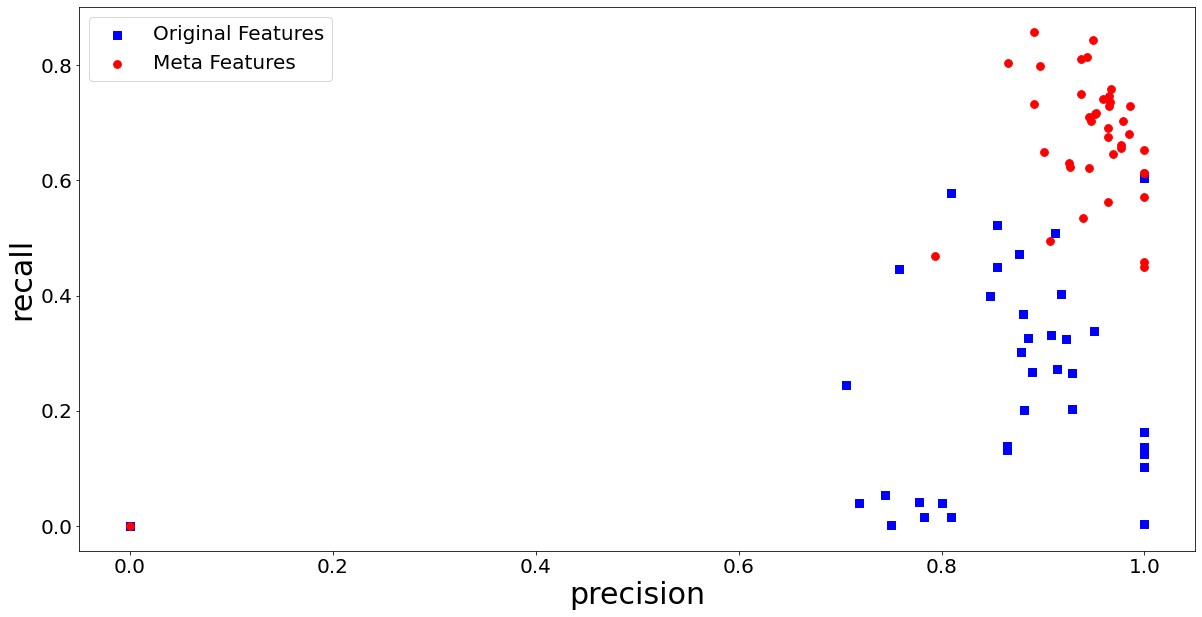

In [8]:
import matplotlib.pyplot as plt

# Define x and y

orig_x = orig_ripper_performance_df['precision']
orig_y = orig_ripper_performance_df['recall']

meta_x = meta_ripper_performance_df['precision']
meta_y = meta_ripper_performance_df['recall']

# Plot data

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.scatter(orig_x, orig_y, s=60, c='b', marker="s", label='Original Features')
ax1.scatter(meta_x, meta_y, s=60, c='r', marker="o", label='Meta Features')
ax1.set_xlabel('precision', fontsize=30)
ax1.set_ylabel('recall', fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(loc='upper left', prop={'size': 20});
plt.show()


## Let's look at just the meta features performance metrics for RIPPER

### Is there a pattern regarding the dataset?
Apparently, no.

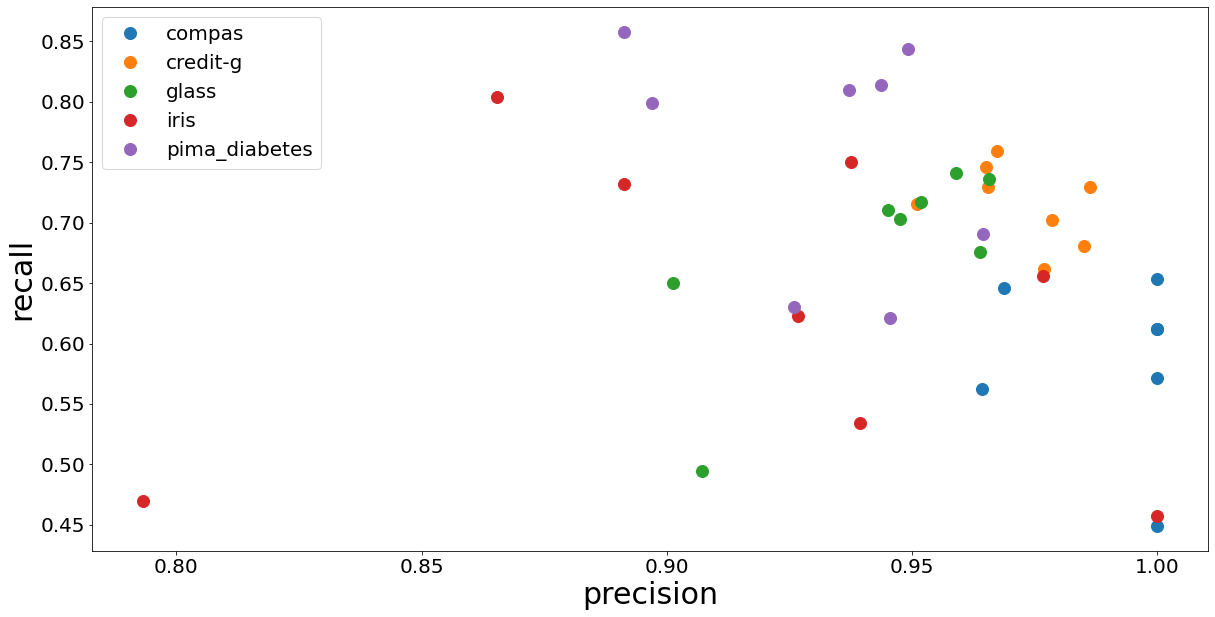

In [20]:
import matplotlib.pyplot as plt

# remove zero values
df = meta_ripper_performance_df[meta_ripper_performance_df.precision != 0]

# group data acording to dataset
groups = df.groupby('dataset')

# Plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax1.plot(group.precision, group.recall, marker='o', linestyle='', ms=12, label=name)
ax1.legend()
ax1.set_xlabel('precision', fontsize=30)
ax1.set_ylabel('recall', fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(loc='upper left', prop={'size': 20});
plt.show()


### Is there a patter regarding the class set?
Apparently, no.

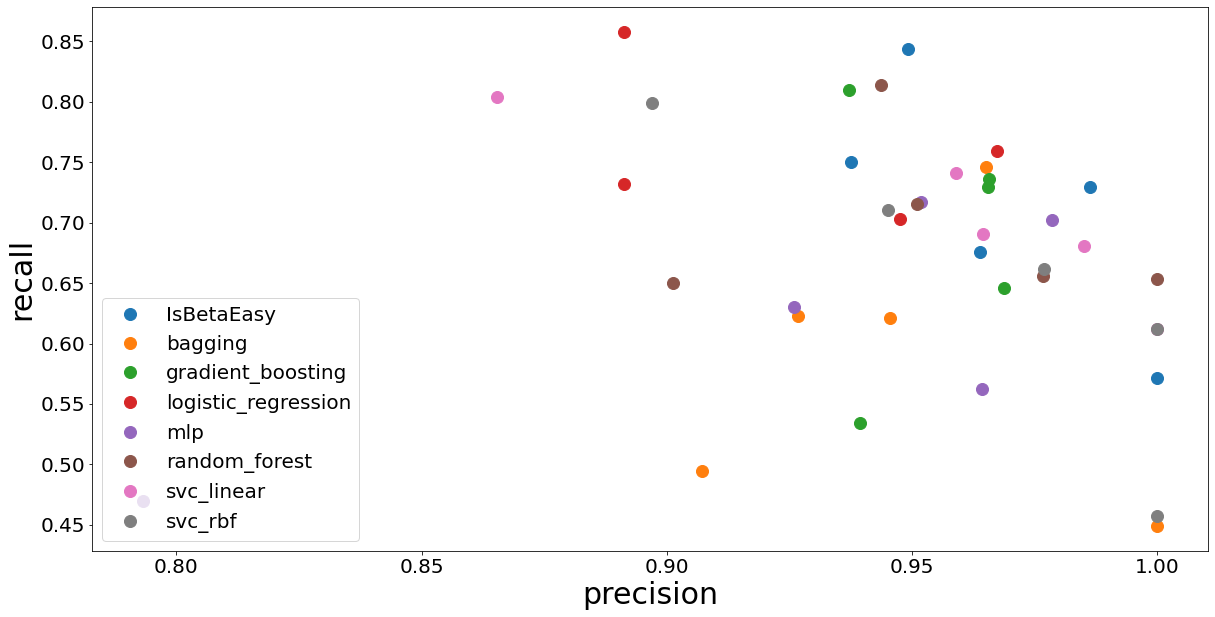

In [23]:
import matplotlib.pyplot as plt

# remove zero values
df = meta_ripper_performance_df[meta_ripper_performance_df.precision != 0]

# group data acording to dataset
groups = df.groupby('class')

# Plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax1.plot(group.precision, group.recall, marker='o', linestyle='', ms=12, label=name)
ax1.legend()
ax1.set_xlabel('precision', fontsize=30)
ax1.set_ylabel('recall', fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(loc='lower left', prop={'size': 20});
plt.show()